## 1. Importing required modules

In [4]:
#importing all required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Loading dataset

In [5]:
df = pd.read_csv("D:\W\My Portfolio\Airbnb case study\Airbnb_data.csv")

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [8]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [9]:
df["neighbourhood_group"].nunique()

5

## 3. Data cleaning and pre-processing

In [10]:
#renaming all columns
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews',
              'calculated_host_listings_count':'host_listings_count'}
df = df.rename(columns = rename_col)

In [11]:
df = df.rename(columns = rename_col)
df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
df.shape

(48895, 16)

In [13]:
#checking null values
df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [15]:
df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [16]:
#dropping unnecessary columns
df = df.drop(['last_review'], axis = 1)
df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [17]:
df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [18]:
#filling null values with '0'
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [19]:
df.isnull().sum()

listing_id              0
listing_name           16
host_id                 0
host_name              21
neighbourhood_group     0
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
minimum_nights          0
total_reviews           0
reviews_per_month       0
host_listings_count     0
availability_365        0
dtype: int64

In [20]:
df.dropna(inplace = True)

In [21]:
df.duplicated().sum()

0

In [22]:
df['price'].value_counts()

price
100    2048
150    2046
50     1531
60     1458
200    1400
       ... 
780       1
386       1
888       1
483       1
338       1
Name: count, Length: 674, dtype: int64

## 4. EDA (Exploratory data analysis)

#### 4.1 Boxplot for Price 

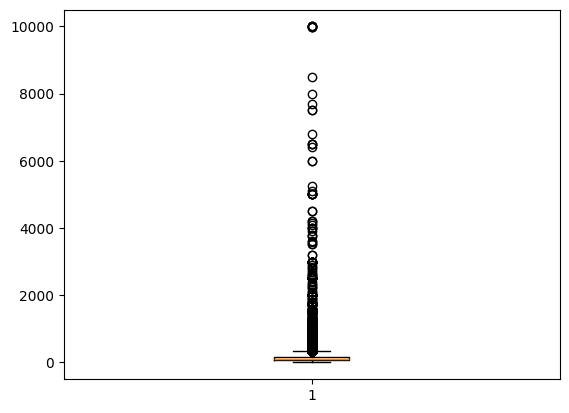

In [23]:
plt.boxplot(df['price'])
plt.show()

#### 4.2 Calculating range of the price 

In [24]:
max = df['price'].max()
min = df['price'].max()
Range = max - min
print(f"max value {max}, min value {min}, Range of price is{Range}")

max value 10000, min value 10000, Range of price is0


#### 4.3 Interquartile range of price

In [25]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
print(Q1, Q3, IQR)

69.0 175.0 106.0


#### 4.4 Percentile value for price

In [26]:
twe=np.percentile(df["price"],25)
sev=np.percentile(df["price"],75)
print(twe,sev)

69.0 175.0


#### 4.5 Outlier detection

In [27]:
uf=Q3+1.5*IQR
lf=Q1-1.5*IQR
print(uf,lf)

334.0 -90.0


In [28]:
df=df[(df["price"]<=uf) & (df["price"]>=lf)]
df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


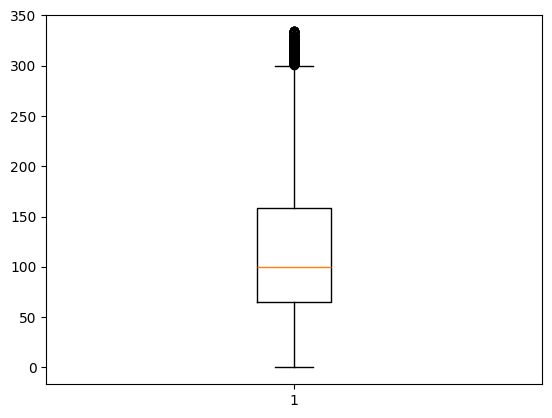

In [29]:
plt.boxplot(df['price'])
plt.show()

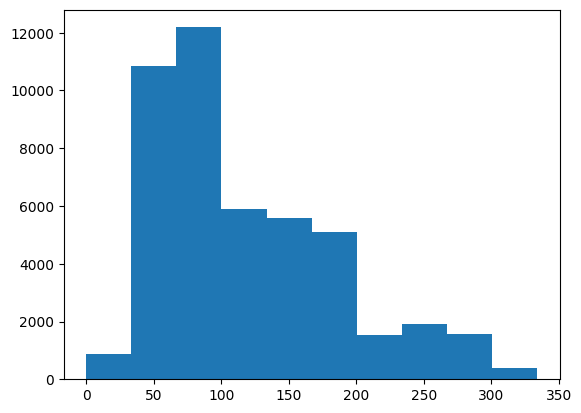

In [30]:
plt.hist(df['price'])
plt.show()

In [31]:
df['price'].mean()

119.97090679277355

#### 4.6 Distribution of Airbnb prices

Text(0.5, 1.0, 'Distribution of Airbnb prices')

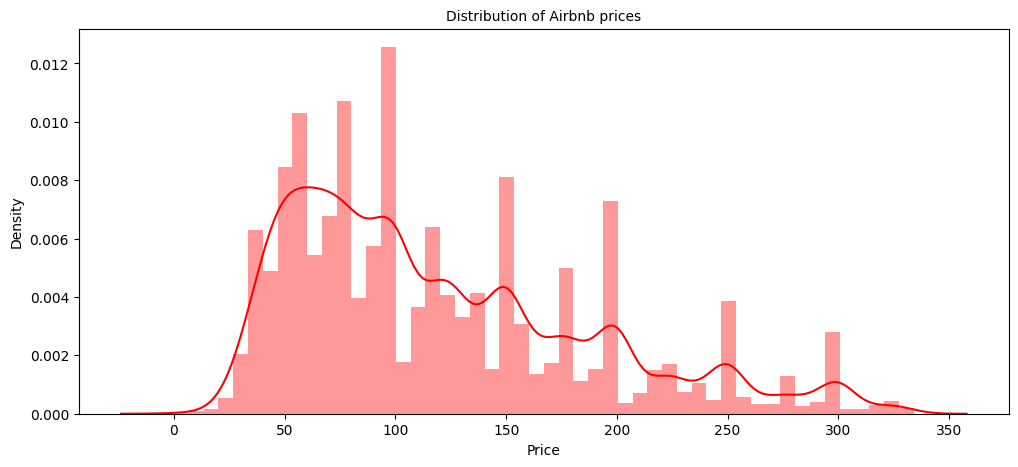

In [32]:
plt.figure(figsize = (12, 5))

sns.distplot(df['price'], color = 'r')

plt.xlabel('Price', fontsize = 10)
plt.ylabel('Density', fontsize = 10)

plt.title('Distribution of Airbnb prices', fontsize = 10)

#### 4.7 Counts of neighbouthood group

In [33]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        19489
Brooklyn         19400
Queens            5565
Bronx             1068
Staten Island      365
Name: count, dtype: int64

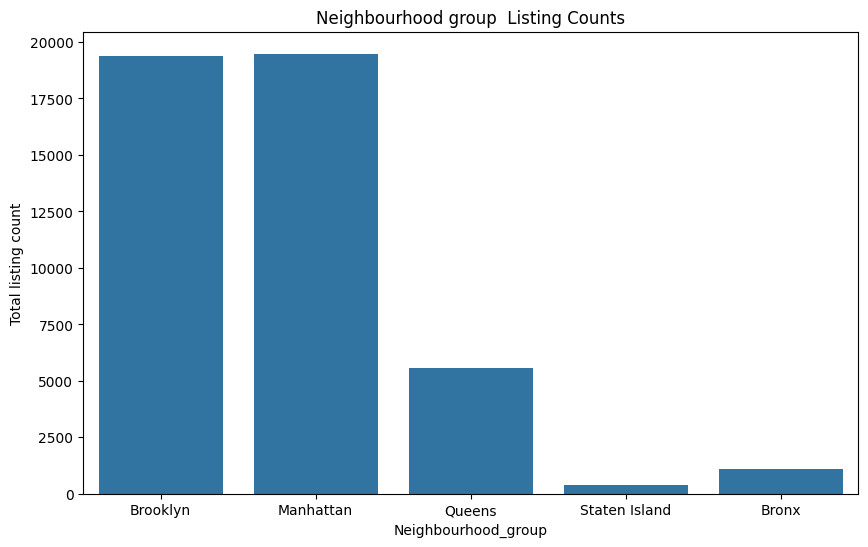

In [34]:
plt.figure( figsize = (10,6))

sns.countplot(data = df, x = 'neighbourhood_group')

plt.title('Neighbourhood group  Listing Counts')

plt.xlabel('Neighbourhood_group', fontsize = 10)
plt.ylabel('Total listing count', fontsize = 10)

plt.show()

In [35]:
room_type_counts = df['room_type'].value_counts()
room_type_counts

room_type
Entire home/apt    22774
Private room       21976
Shared room         1137
Name: count, dtype: int64

#### 4.8 Proportion of Room types by category

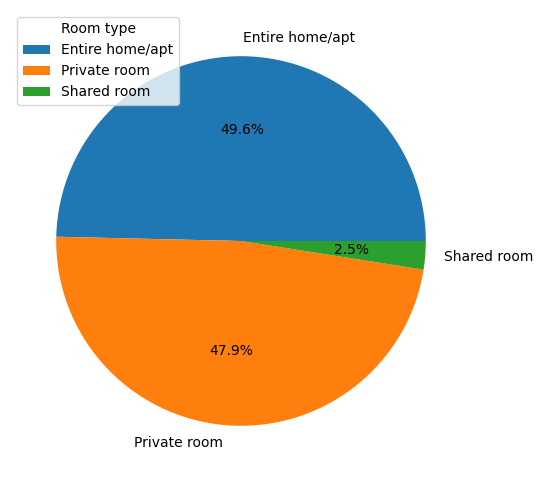

In [36]:
plt.figure(figsize = (10,6))
labels = room_type_counts.index
sizes = room_type_counts.values
plt.pie(sizes, labels = labels, autopct = '%1.1f%%')
plt.legend(title = 'Room type')
plt.show()


#### 4.9 Average price by neighbourhood group

Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

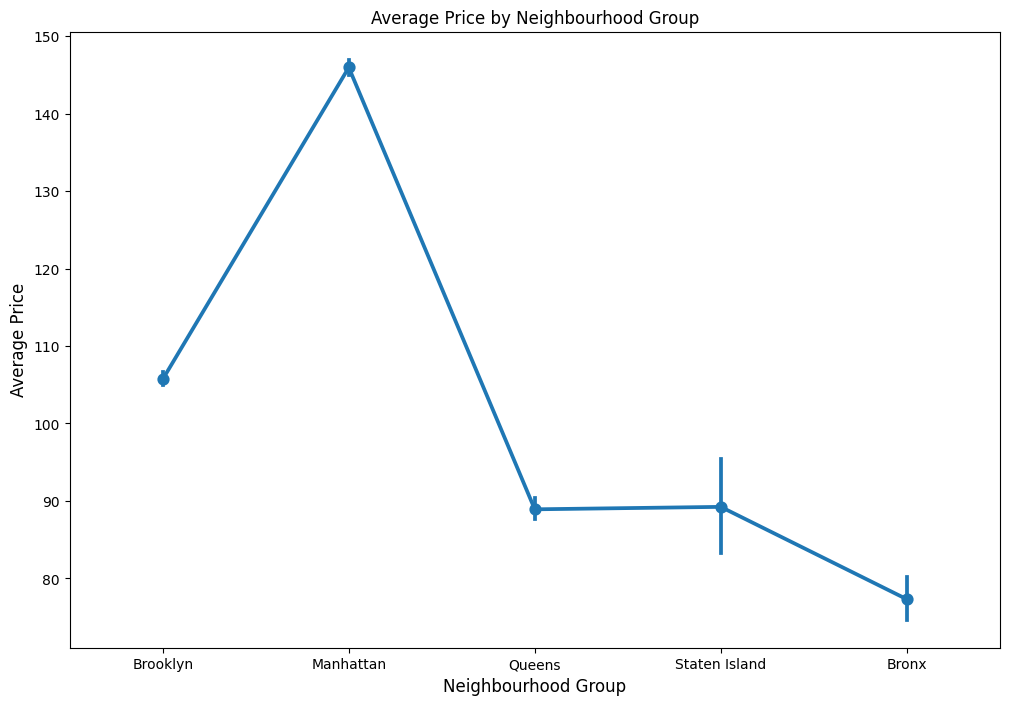

In [64]:
plt.figure(figsize=(12, 8))
sns.pointplot(x = 'neighbourhood_group', y='price', data=df, estimator = np.mean) # estimator is a paramter based on which the calculation will be made to plot the error barss
plt.xlabel('Neighbourhood Group',fontsize=12)
plt.ylabel('Average Price',fontsize=12)
plt.title('Average Price by Neighbourhood Group',fontsize=12)

## 5. Correlation analysis

In [38]:
df.corr(numeric_only = True)

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
listing_id,1.000000,0.581393,-0.008027,0.101547,-0.018063,-0.013829,-0.320693,0.178793,0.125551,0.073377
host_id,0.581393,1.000000,0.015943,0.144474,-0.034668,-0.017937,-0.136711,0.208139,0.147280,0.193928
latitude,-0.008027,0.015943,1.000000,0.091374,0.068766,0.025985,-0.012324,-0.017930,0.021455,-0.017249
longitude,0.101547,0.144474,0.091374,1.000000,-0.306978,-0.064215,0.053944,0.140833,-0.107684,0.096995
price,-0.018063,-0.034668,0.068766,-0.306978,1.000000,0.031472,-0.027675,-0.047422,0.174450,0.066710
minimum_nights,-0.013829,-0.017937,0.025985,-0.064215,0.031472,1.000000,-0.082934,-0.127869,0.133638,0.146438
total_reviews,-0.320693,-0.136711,-0.012324,0.053944,-0.027675,-0.082934,1.000000,0.593655,-0.070557,0.183409
reviews_per_month,0.178793,0.208139,-0.017930,0.140833,-0.047422,-0.127869,0.593655,1.000000,-0.051093,0.171450
host_listings_count,0.125551,0.147280,0.021455,-0.107684,0.174450,0.133638,-0.070557,-0.051093,1.000000,0.225704
availability_365,0.073377,0.193928,-0.017249,0.096995,0.066710,0.146438,0.183409,0.171450,0.225704,1.000000


<Axes: >

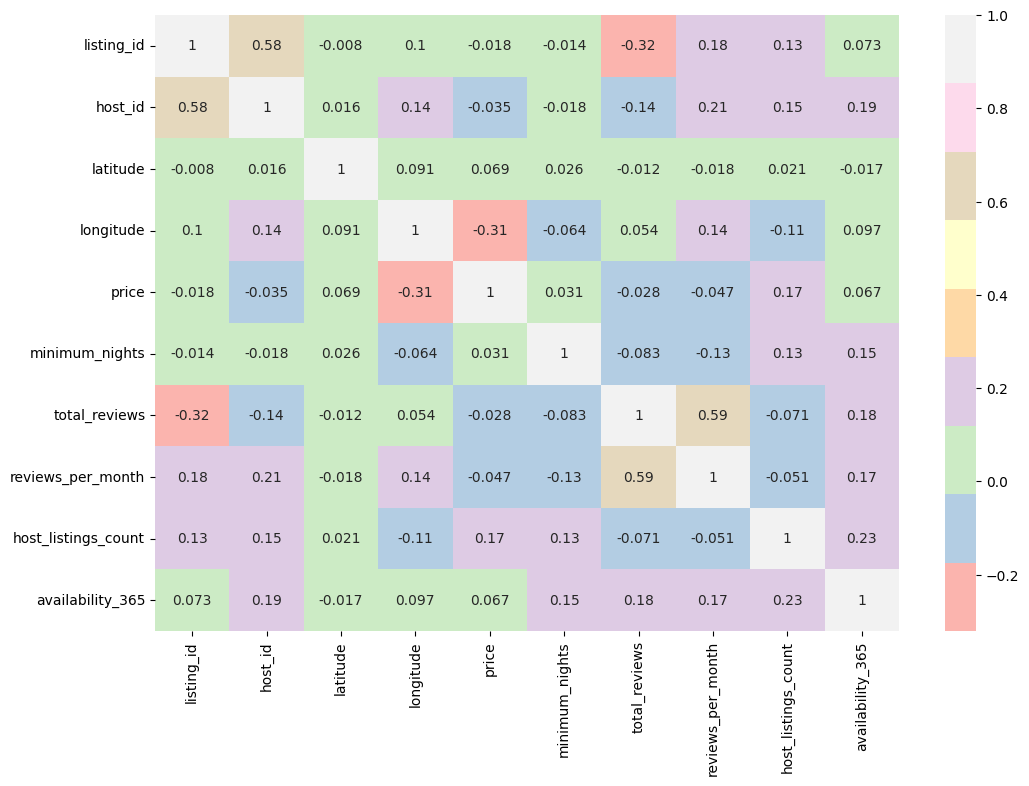

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Pastel1')

## 6. Statistical analysis

In [40]:
from scipy.stats import f_oneway

data = df[['price', 'neighbourhood_group']]
neighbourhood_groups = data['neighbourhood_group'].unique()
grouped_data = [data['price'][data['neighbourhood_group'] == group] for group in neighbourhood_groups]
statistic, p_value = f_oneway(*grouped_data)

print("One-way ANOVA results:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

In [41]:
data

,price,neighbourhood_group
0,149,Brooklyn
1,225,Manhattan
2,150,Manhattan
3,89,Brooklyn
4,80,Manhattan
...,...,...
48890,70,Brooklyn
48891,40,Brooklyn
48892,115,Manhattan
48893,55,Manhattan


In [42]:
grouped_data

[0        149
 3         89
 6         60
 12        89
 15       140
         ... 
 48882     40
 48884    190
 48887    170
 48890     70
 48891     40
 Name: price, Length: 19400, dtype: int64,
 1        225
 2        150
 4         80
 5        200
 7         79
         ... 
 48886    200
 48888    125
 48892    115
 48893     55
 48894     90
 Name: price, Length: 19489, dtype: int64,
 46       130
 77        70
 143      140
 161       79
 196       55
         ... 
 48858     68
 48863     93
 48866     58
 48878     45
 48889     65
 Name: price, Length: 5565, dtype: int64,
 169       70
 249       36
 250       37
 251       37
 256       36
         ... 
 48401     65
 48441     40
 48446    100
 48649     54
 48799    235
 Name: price, Length: 365, dtype: int64,
 171       40
 207       45
 260       90
 261      105
 309       90
         ... 
 48783    140
 48792     80
 48795    125
 48796     70
 48805    100
 Name: price, Length: 1068, dtype: int64]

In [43]:
neighbourhood_groups

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

#### Oneway Annova test

In [44]:
statistic, p_value = f_oneway(*grouped_data)

print("One-way ANOVA results:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

One-way ANOVA results:
Statistic: 1506.924447409242
P-value: 0.0


In [45]:
# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in the average room prices between different neighborhood groups.")
else:
    print("There is no significant difference in the average room prices between different neighborhood groups.")

There is a significant difference in the average room prices between different neighborhood groups.


In [46]:
brooklyn_prices = df[df['neighbourhood_group'] == 'Brooklyn']['price']
manhattan_prices = df[df['neighbourhood_group'] == 'Manhattan']['price']

In [47]:
brooklyn_prices.head()

0     149
3      89
6      60
12     89
15    140
Name: price, dtype: int64

In [48]:
manhattan_prices.head()

1    225
2    150
4     80
5    200
7     79
Name: price, dtype: int64

In [66]:
print(brooklyn_prices.mean())
print(manhattan_prices.mean())

105.71345360824742
145.94289086151161


145.94289086151161

#### Ratio of means between "Brooklyn prices" and "Manhattan prices"

In [67]:
from scipy.stats import f
F=brooklyn_prices.mean()/manhattan_prices.mean()
F

0.7243480856396165

In [52]:
F

0.7243480856396165

#### Calculating P-value

In [68]:
df1=len(brooklyn_prices)-1
df2=len(manhattan_prices)-1
p_value=1-f.cdf(df1,df2,F)
print(p_value)
if p_value < 0.05:
    print("Variances of both the samples are not equal.")
else:
    print("Variances of both the samples are equal.")

0.021773985421123965
Variances of both the samples are not equal.


In [54]:
p_value=1-f.cdf(df1,df2,F)
p_value

0.021773985421123965

In [55]:
if p_value < 0.05:
    print("Variances of both the samples are not equal.")
else:
    print("Variances of both the samples are equal.")

Variances of both the samples are not equal.


#### Performing 2 sample T-test

In [69]:
from scipy.stats import ttest_ind

t_stats, p_value2=ttest_ind(brooklyn_prices,manhattan_prices, equal_var=False)
print(p_value2)
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in average room prices between Brooklyn and Manhattan.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average room prices between Brooklyn and Manhattan.")

0.0
Reject the null hypothesis. There is a significant difference in average room prices between Brooklyn and Manhattan.


In [57]:
print(p_value2)

0.0

In [ ]:
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in average room prices between Brooklyn and Manhattan.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average room prices between Brooklyn and Manhattan.")

#### Checking association between two samples using Contigency table  

In [58]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['neighbourhood_group'], df['room_type'])
contingency_table

In [59]:
contingency_table = pd.crosstab(df['neighbourhood_group'], df['room_type'])
contingency_table

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,362,648,58
Brooklyn,8936,10053,411
Manhattan,11286,7738,465
Queens,2022,3349,194
Staten Island,168,188,9


In [60]:
chi2_stat, p_value3, dof, expected = chi2_contingency(contingency_table)

In [61]:
p_value3

9.545015557384096e-252

In [62]:
if p_value < 0.05:
    print("Reject the null hypothesis. there is  association between both the samples")
else:
    print("Fail to reject the null hypothesis there is no association between both the samples.")

Reject the null hypothesis. there is  association between both the samples
